In [47]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from numpy import argmax

In [5]:
bank = pd.read_csv('bank-full.csv',delimiter=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
bank.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# some visualizations can add more according to the data and problem statement 

<AxesSubplot:xlabel='y', ylabel='count'>

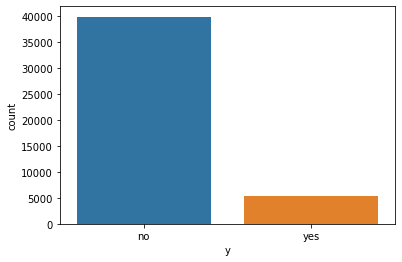

In [9]:
sns.countplot(x=bank['y'])
# majority of the clients has not opted for subscription of term deposit

Text(0, 0.5, 'Frequency of subscribtion')

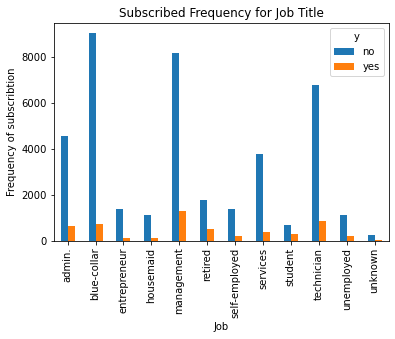

In [10]:
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('Subscribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of subscribtion')


<AxesSubplot:>

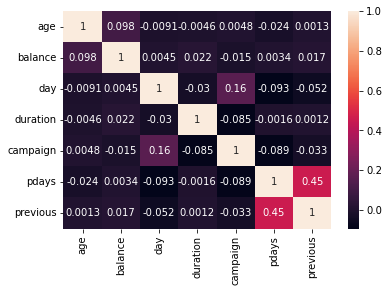

In [11]:
corr_matrix = bank.corr()
sns.heatmap(corr_matrix,annot=True)

In [12]:
bank.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
# trying to assign labels to all categorical data using label encoder 

In [14]:
columns = [ 'job', 'marital', 'education', 'default','housing','loan', 'contact', 'month', 'campaign', 'poutcome', 'y']

In [15]:
for i in columns:
    bank[i] = LabelEncoder().fit_transform(bank[i]) # here i am using for loop

In [16]:
# let's standardize the data 
std_bank = StandardScaler().fit_transform(bank.iloc[:,:15])

In [17]:
# spltiiting into x and y 
x = std_bank
y =bank[['y']]

In [18]:
# train test splitting 
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.3,random_state=40)

In [19]:
# modelling

In [20]:
model =LogisticRegression().fit(x_train,y_train)

C:\Users\Rohith Challam\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
model.intercept_

array([-2.7059621])

In [22]:
model.coef_

array([[ 0.08488967,  0.01453355,  0.14339228,  0.14556697, -0.03688205,
         0.05954257, -0.51844826, -0.28442491, -0.57186545, -0.05122645,
         0.11336509,  1.0404153 , -0.36554147,  0.20238276,  0.15276121]])

In [23]:
y_pred_train = model.predict(x_train)

In [24]:
# predictions for x_test

In [25]:
y_pred_test = model.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
# confusion matrix 

<AxesSubplot:>

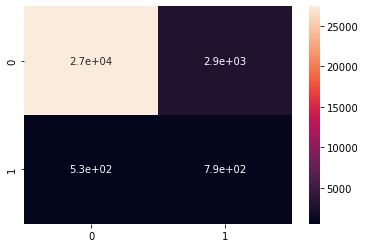

In [27]:
confusion_matrix_train = confusion_matrix(y_pred_train,y_train)
sns.heatmap(confusion_matrix_train ,annot=True)

<AxesSubplot:>

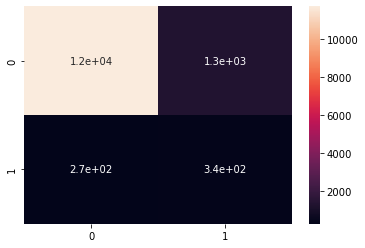

In [28]:
confusion_matrix_test = confusion_matrix(y_pred_test,y_test)
sns.heatmap(confusion_matrix_test,annot=True)

In [29]:
# classification_reports

In [30]:
classification_report_train = classification_report(y_train,y_pred_train)
classification_report_train

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94     27957\n           1       0.60      0.21      0.32      3690\n\n    accuracy                           0.89     31647\n   macro avg       0.75      0.60      0.63     31647\nweighted avg       0.87      0.89      0.87     31647\n'

In [31]:
classification_report_test = classification_report(y_test,y_pred_test)
classification_report_test

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94     11965\n           1       0.56      0.22      0.31      1599\n\n    accuracy                           0.89     13564\n   macro avg       0.73      0.60      0.63     13564\nweighted avg       0.86      0.89      0.86     13564\n'

In [32]:
# checking train_accuracy 
accuracy_train = accuracy_score(y_train,y_pred_train)*100
accuracy_train

89.15853003444244

In [33]:
# checking test_accuracy
accuracy_test = accuracy_score(y_test,y_pred_test)*100
accuracy_test
# train and test accuracy are nearly same 

88.78649365968741

In [ ]:
# for ROC plotting 

In [38]:
auc_score_train=roc_auc_score(y_train,y_pred_train)
auc_score_train

0.5977845768370764

In [40]:
auc_score_test=roc_auc_score(y_test,y_pred_test)
auc_score_test

0.5964514752351227

In [ ]:
# ROC curve  for train data 

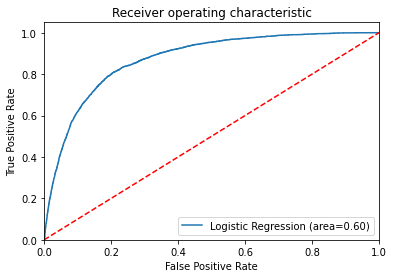

In [42]:
fpr, tpr, thresholds = roc_curve(y_train,model.predict_proba(x_train)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% auc_score_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [ ]:
# ROC curve for test data 

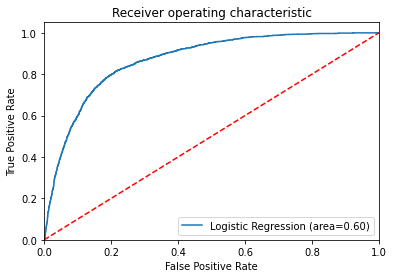

In [44]:
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% auc_score_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [45]:
fpr

array([0.00000000e+00, 8.35770999e-05, 8.35770999e-05, ...,
       9.91224405e-01, 9.91224405e-01, 1.00000000e+00])

In [46]:
tpr

array([0.00000000e+00, 0.00000000e+00, 6.25390869e-04, ...,
       9.99374609e-01, 1.00000000e+00, 1.00000000e+00])

In [49]:
k = tpr - fpr
x = argmax(k)
threshold = thresholds[x]
print('Best Threshold=%f' % (threshold.round(2)))

Best Threshold=0.120000
